# DATASET -2

### Black Friday Dataset EDA and Feature Engineering

### Problem Statement
### **********************
#### A retail company "ABC Private Limited" wants to understand teh customer pruchase behaviour against various products of different categories. The data shared is purchase summary of various customers for selected high volume products .products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

#### Now, they want to build a model to predict the purchase amount of customer against various productrs which will help them to create personalized offer for customer against different products

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

#### Importing the dataset

In [4]:
df_train=pd.read_csv('train_blackfriday.csv')
df_test=pd.read_csv('train_blackfriday.csv')

In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df_train.shape

(550068, 12)

In [8]:
df=df_train.append(df_test)#we can also use merge
df.head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_16392\4189742415.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)#we can also use merge


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   User_ID                     1100136 non-null  int64  
 1   Product_ID                  1100136 non-null  object 
 2   Gender                      1100136 non-null  object 
 3   Age                         1100136 non-null  object 
 4   Occupation                  1100136 non-null  int64  
 5   City_Category               1100136 non-null  object 
 6   Stay_In_Current_City_Years  1100136 non-null  object 
 7   Marital_Status              1100136 non-null  int64  
 8   Product_Category_1          1100136 non-null  int64  
 9   Product_Category_2          752860 non-null   float64
 10  Product_Category_3          333642 non-null   float64
 11  Purchase                    1100136 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 109.1+ M

#### User Id is unique so we can drop from data frame

In [10]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            347276
Product_Category_3            766494
Purchase                           0
dtype: int64

### Handling Categorical Feature Gender

In [12]:
pd.get_dummies(df['Gender'])#give categorical values in numerical
df['Gender']=df['Gender'].map({'F':0,'M':1})
df['Gender']=df['Gender'].replace({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


#### female--->0
#### male--->1

#### ***************************************************

### Handle Categorical Feature Age

In [13]:
df['Age'].unique()#how many unique values are there

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
pd.get_dummies(df['Age'])
df['Age']=df['Age'].replace({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


#### 1--->0-17
#### 2--->18-25
#### 3--->26-35
#### 4--->36-45
#### 5--->46-50
#### 6--->51-55
#### 7--->55+

#### Using label encoder function

In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
a=label.fit_transform(df['Age'])
a[:5]

array([0, 0, 0, 0, 6], dtype=int64)

### City_Category

In [16]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [17]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [18]:
#Drop Category City
df.drop('City_Category',axis=1,inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969,0,1


### Missing Values

In [20]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            347276
Product_Category_3            766494
Purchase                           0
B                                  0
C                                  0
dtype: int64

### Replacing Missing Values

In [21]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df['Product_Category_2'].value_counts()

8.0     128176
14.0    110216
2.0      98434
16.0     86510
15.0     75710
5.0      52470
4.0      51354
6.0      32932
11.0     28268
17.0     26640
13.0     21062
9.0      11386
12.0     11056
10.0      6086
3.0       5768
18.0      5540
7.0       1252
Name: Product_Category_2, dtype: int64

#### We replace the missing values with mode

In [23]:
a=df['Product_Category_2'].mode()[0]
df['Product_Category_2'].fillna(a,inplace=True)

In [24]:
df['Product_Category_2'].isnull().sum()#mode is filled in the missing values

0

In [25]:
a=df['Product_Category_3'].mode()[0]
df['Product_Category_3'].fillna(a,inplace=True)

In [26]:
df['Product_Category_3'].isnull().sum()

0

In [27]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

### Stay In Current City Years

In [28]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

#### Here we only need to remove plus from 4+

In [29]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years'].head()

C:\Users\aksha\AppData\Local\Temp\ipykernel_16392\2235329919.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  object 
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  B                           1100136 non-null  uint8  
 11  C                           1100136 non-null  uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage

#### Here  "Stay_In_Current_Years"   is having numerical data but it is stored as object so we need to convert this feature into integer

In [31]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)#converted into integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  int32  
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  B                           1100136 non-null  uint8  
 11  C                           1100136 non-null  uint8  
dtypes: float64(2), int32(1), int64(6), object(1), uint8(2)
me

In [32]:
df[['B','C']]=df[['B','C']].astype(int)#converted uint8 to int32(not necessary)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  int32  
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  B                           1100136 non-null  int32  
 11  C                           1100136 non-null  int32  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage

In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969,0,1


### Visualisations
### **************

### Barplot of Age vs Purchase

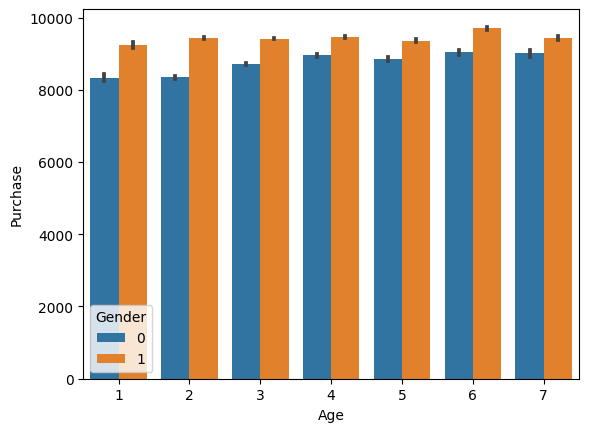

In [38]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)
plt.show()

### Observations
### ***************
#### ---> We can say that purchase of men is higher than women

#### ***********************************************************************

### Purchase with ocupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

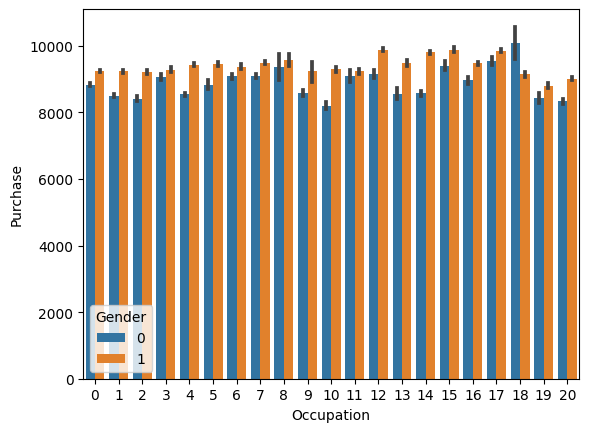

In [40]:

sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

### Product Category vs Purchase

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

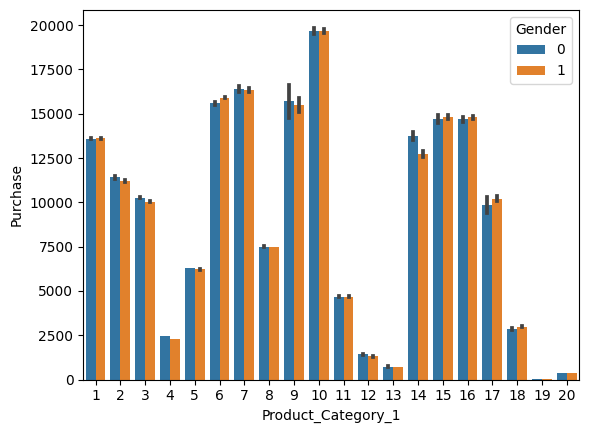

In [41]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

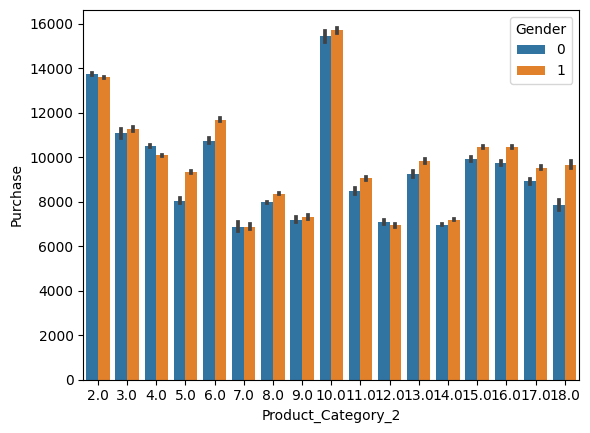

In [42]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

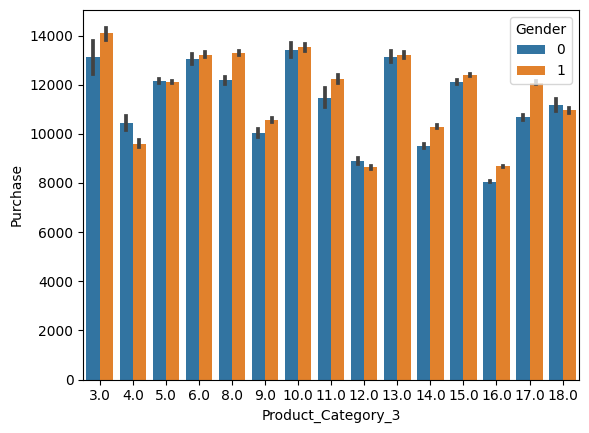

In [43]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [55]:
a=pd.pivot_table(df,index=['Product_Category_1'],values=['Purchase'],aggfunc='count')

In [56]:
a

,Purchase
Product_Category_1,
1,280756
2,47728
3,40426
4,23506
5,301866
6,40932
7,7442
8,227850
9,820


### Observations
### ***************
#### ---> the pivot table gives the count of  products purchases in Product_Category_1
#### --->product category 9 has lowest amount of purchase 
#### --->product category 1 has highest amount of purchases 

In [65]:
df.pivot_table(index=['Product_Category_2'],values=['Purchase'],aggfunc='count')

,Purchase
Product_Category_2,
2.0,98434
3.0,5768
4.0,51354
5.0,52470
6.0,32932
7.0,1252
8.0,475452
9.0,11386
10.0,6086


### Observations
### ***************
#### ---> the pivot table gives the count of  products purchases in Product_Category_2
#### --->product category 8.0 has highest amount of purchase
#### --->product category 7.0 has lowest amount of purchases

In [67]:
df.pivot_table(index=['Product_Category_3'],values=['Purchase'],aggfunc='count')

,Purchase
Product_Category_3,
3.0,1226
4.0,3750
5.0,33316
6.0,9780
8.0,25124
9.0,23158
10.0,3452
11.0,3610
12.0,18492


### Observations
### ***************
#### ---> the pivot table gives the count of  products purchases in Product_Category_3
#### --->product category 16.0 has highest amount of purchase
#### --->product category 3.0 has lowest amount of purchases

### *******************************************************************************

### Train-Test Split
### ---------------------

In [68]:
df_test=df[df['Purchase'].isnull()]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [69]:
df_train=df[~df['Purchase'].isnull()]

In [96]:
X=df_train
X.head()
X.drop('Purchase',axis=1,inplace=True)
X.drop('Product_ID',axis=1,inplace=True)

In [97]:
X.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C'],
      dtype='object')

In [98]:
X.shape

(1100136, 10)

In [89]:
y.shape

(1100136,)

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [100]:
X_train.head()
X_train.shape

(737091, 10)

In [106]:
X_test.shape

(363045, 10)

### Feature Scaling
### ---------------------

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Train Your Model
### ----------------------